In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster, mixture

colorsList = ['c','r','g']
CustomCmap = matplotlib.colors.ListedColormap(colorsList)


sigma1=16
sigma2=4
npoints = 2000

s = (100,100)
x1 = np.random.normal( 50, sigma1, npoints )
y1 = np.random.normal( 70, sigma1, npoints )

x2 = np.random.normal( 20, sigma2, npoints )
y2 = np.random.normal( 50, sigma2, npoints )

x = np.hstack((x1,x2))
y = np.hstack((y1,y2))






[[20.099261   50.05308724]
 [50.05176063 69.87077822]]
test var 1 :  4.089641642157821
test var 2 :  15.712554175702792
[[[ 1.68827850e+01 -7.46179977e-01]
  [-7.46179977e-01  1.65675525e+01]]

 [[ 2.44761769e+02  5.35003003e-02]
  [ 5.35003003e-02  2.49006948e+02]]]


Text(0.5, 1.0, 'GMM Associated data')

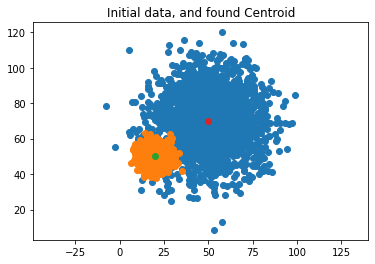

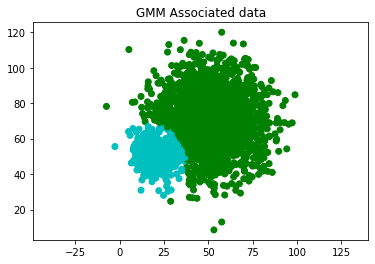

In [4]:

C = mixture.GaussianMixture(n_components= 2 , covariance_type='full'  )
subdata = np.transpose( np.vstack((x,y)) )
C.fit( subdata )

m = C.means_
w = C.weights_
cov = C.covariances_


print('\n')
print(C.means_)
print( 'test var 1 : ' , np.sqrt(  np.trace( cov[0]) /2 ) )
print( 'test var 2 : ' , np.sqrt(  np.trace( cov[1]) /2 ) )
print(cov)

plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.scatter( m[0,0], m[0,1])
plt.scatter( m[1,0], m[1,1])
plt.title('Initial data, and found Centroid')
plt.axis('equal')



gmm_sub_sigmas = [ np.sqrt(  np.trace(cov[i])/2) for i in range(0,2) ]
xdiff= (np.transpose(np.repeat([x],2 ,axis=0)) - m[:,0]) / gmm_sub_sigmas
ydiff= (np.transpose(np.repeat([y],2 ,axis=0)) - m[:,1]) / gmm_sub_sigmas
#            distances = np.hypot(xdiff,ydiff)  #not the effective distance for gaussian distributions...
distances = 0.5*np.hypot(xdiff,ydiff) + np.log(gmm_sub_sigmas)  # I believe this is a good estimate of closeness to a gaussian distribution
res2 = np.argmin( distances , axis=1) 

plt.figure()
plt.scatter(x,y, c=res2, cmap=CustomCmap )
plt.axis('equal')
plt.title('GMM Associated data')
